# Appendix C: Laplace transforms & filters

This notebook provides a brief summary of laplace transforms, and their use in analysing a system's response to an input signal $u(t)$.

## The impulse response

This part of the text follows the outline given in "Handleiding bij de cursus Systeemanalyse" by Harm A. van Essen, 2002, and glosses over some tricky maths.

Let $\delta(t)$ be the [unit impulse](https://en.wikipedia.org/wiki/Dirac_delta_function) or Dirac delta, which is commonly thought of as

\begin{align}
\delta(t - t_0) = \begin{cases}
\infty, &t = t_0\\
0, &t \neq t_0\end{cases}
\end{align}

but has a more complicated "proper" definition as a [generalised function](https://en.wikipedia.org/wiki/Generalized_function) with properties:

1. $$\int_a^b \delta(t)dt = 1 \quad\text{if } 0 \in [a, b] $$
2. $$\int_a^b \delta(t)dt = 0 \quad\text{if } 0 \notin [a, b]$$
3. $$\int_{-\infty}^{\infty} \delta(t - t_0)g(t)\,dt = g(t_0)$$

The response to a system driven with $\delta$ is called the [impulse response](https://en.wikipedia.org/wiki/Impulse_response), and will be denoted here as $h(t)$.

The impulse response for lots of functions can be found in tables, but can also be worked out by hand. For example, given a system defined by 

$$ \dot{y}(t) + ay(t) = u(t) $$

where $y$ is the state, $u$ is the input and $a$ is a non-zero constant, we can fill in $u(t)=\delta(t)$ and $y(t)=h(t)$ (by h's definition) so that 

$$ \dot{h}(t) + ah(t) = \delta(t) $$

Away from $t = 0$, we have $\delta(t) = 0$ and so we can separate $\frac{dh}{dt} = -ah$ as usual to find $h(t) = h_0 e^{-at}$.
The situation near the discontinuity is harder to analyse, but the accepted solution is to let $h$ be zero just before it, $h(0^-) = 0$, and 1 immediately after it $h(0^+) = 1$.
With this, the full impulse response becomes

\begin{align}
h(t) = \begin{cases}
    e^{-at}, &t>0, \\
    0, &t<0 \end{cases}
\end{align}
    

### The superposition principle

Next, we introduce the **superposition principle**.
This holds if, when input $u_1(t)$ has response $y_1(t)$ and input $u_2(t)$ has response $y_2(t)$, any **linear combination** of the input signals $u(t) = \alpha_1 u_1(t) + \alpha_2 u_2(t)$ results in the same linear combination of responses $y(t) = \alpha_1 y_1(t) + \alpha_2 y_2(t)$.

The class of systems satisfying this priniciple are called **linear systems**.



### Decomposing arbitrary inputs into impulse responses

Where the superposition principle holds, we can analyse the response to any input signal $u(t)$ by decomposing into inputs with known responses.
If we're willing to do some maths, this can even be an infinite number of sub-inputs, for example sine waves or, in this case, the unit impulse.

Again, let $\delta(t - \tau)$ be a unit impulse input, and $h(t - \tau)$ the impulse response, then we can write $u(t)$ as a linear combination with an infinite number of terms $u(\tau)\delta(t - \tau)\,d\tau$ (where $\tau$ is a constant):
\begin{align}
u(t) = \int_{-\infty}^\infty u(\tau)\delta(t - \tau)\,d\tau
\end{align}
writing the same linear combination for the known step responses $h(t - \tau)$ we find:
\begin{align}
y(t) = \int_{-\infty}^\infty u(\tau)h(t - \tau)\,d\tau
\end{align}

These horrible forms are known as "convolution integrals", sometimes denoted with a $*$:
\begin{align}
(f * g)(t) = \int_{-\infty}^\infty f(\tau)g(t - \tau)\,d\tau
\end{align}
where the left hand side notation is meant to convey that this is an operation on _functions_: we are not convolving the functions themselves, not their evaluations on some specific value of $t$.
Convolution is not restricted to time-varying functions: $t$ represents any free variable.
For people who love properties of things we can add that $(f * g)(t) = (g * t)(t)$.

In summary:

1. The impulse function is a slightly dubious "generalised function" for which $\int_a^b\delta(t)dt=1$ if and only if $0\in[a, b]$.
2. A system's response to being driven with a unit impulse is called its impulse response, and can be derived or looked up in tables.
3. If the system obeys the superposition principle, we can write its response to an arbitrary input signal as a convolution integral of the input and the impulse response.

## The Laplace transform

The Laplace transform is a one-to-one mapping between function spaces: it can be applied to a function "in the time domain" to yield another "in the Laplace domain".
A typical use case is to apply the Laplace transformation, manipulate the function in ways that would have been harder in the time domain, and then transform back.

For a function $f(t)$ on $t \geq 0$, its Laplace transformation $F(s)$ is defined as

\begin{equation}
F(s) = \int_0^\infty f(t) e^{-st} dt
\end{equation}

where $s$ is the new free variable, and is a complex number (so we're mapping 1-d functions onto 2-d functions!).

We can denote this transfer as $\mathcal{L}\{f(t)\} = F(s)$

### The inverse transform?

Being a nice one-to-one mapping, the Laplace transformation should have an inverse.
You can find it on [wikipedia](https://en.wikipedia.org/wiki/Inverse_Laplace_transform), but it's more common to rely on tables when converting back to the time domain, and even more common to end the analysis without ever converting back!

## Some things are easier in the Laplace domain

The Laplace transform has some very nice properties.
For starters, **linear combinations** stay the same:

\begin{align}
& \int_0^\infty \left[a f(t) + b g(t)\right] e^{-st} dt \\
&= a \int_0^\infty f(t) e^{-st} dt + b \int_0^\infty g(t) e^{-st} dt \\
&= aF(s) + bG(s)
\end{align}

### Time-derivatives

More surprisingly, time-derivatives become multiplications by powers of $s$.

Starting from
\begin{align}
\int_0^\infty \dot{f}(t) e^{-st} dt
\end{align}

we use integration by parts $\int U dV = UV - \int V dU$ with $U=e^{-st}$ and $dV=\dot{f}(t)dt$ to find

\begin{align}
\int_0^\infty \dot{f}(t) e^{-st} dt
&= \left[f(t)e^{-st}\right]_0^\infty + \int_0^\infty f(t)se^{-st} dt \\
&= 0 - f(0)e^0 + s \int_0^\infty f(t)e^{-st} dt \\
&= s F(s) - f(0)
\end{align}

or

\begin{align}
\mathcal{L}\{\dot{f}(t)\} = s F(s) - f(0)
\end{align}

Similarly, for second order time-derivatives we get $\mathcal{L}\{\ddot{f(t)}\} = s^2F(s) - sf(0) - \dot(f)(0)$.

### Convolution and impulse response

Most importantly, ugly convolution becomes multiplication.

To prove this, you start by writing out
\begin{align}
\mathcal{L}\{f*g\} = \int_0^\infty \left(\int_0^t f(\tau) g(t-\tau) \,d\tau \right)e^{-st}dt
\end{align}
and then, if you're _really_ good at integrals, you do several tricks and end up with
\begin{align}
=F(s)G(s)
\end{align}

As a result, for a system with input $u$ and impulse response $h(t)$, we can replace
\begin{align}
y(t) = \int_{-\infty}^\infty u(\tau)h(t - \tau)\,d\tau
\end{align}
with
\begin{align}
Y(s) = H(s) U(s)
\end{align}

where $H(s) = Y(s)/U(s)$ is called the system's **transfer function**.

### More properties

There's a [list on wikipedia](https://en.wikipedia.org/wiki/Laplace_transform#Properties_and_theorems).

## Some transformed functions

Exponentials:
$$\mathcal{L}\{e^{-at}\} = \frac{1}{s + a}$$

Sine & cosine:
$$\mathcal{L}\{\sin(\omega t)\}
    = \mathcal{L}\left\{\frac{e^{i \omega t} - e^{i \omega t}}{2i}\right\}
    = \frac{\omega}{s^2 + \omega^2}$$

$$\mathcal{L}\{\cos(\omega t)\}
    = \mathcal{L}\left\{\frac{e^{i \omega t} + e^{i \omega t}}{2}\right\}
    = \frac{s}{s^2 + \omega^2}$$

The impulse function:
$$\mathcal{L}\{\delta(t)\} = 1$$

The step function, defined as 
\begin{equation}
\theta(t - t_0) = \begin{cases}1, &t > t_0\\0, &t < t_0\end{cases}
\end{equation}
has Laplace transform
\begin{equation}
\mathcal{L}\{\alpha \theta(t)\} = \frac{\alpha}{s}
\end{equation}
(we have left the value at 0 undefined, but there are [other choices](https://en.wikipedia.org/wiki/Heaviside_step_function)).

There are lots of tables of Laplace transforms out there, including the [Laplace transform wikipedia page](https://en.wikipedia.org/wiki/Laplace_transform).

## Poles and zeros

The form

\begin{align}
F(s) = \frac{a_ms^m + a_{m-1}s^{m-1} + ...}{b_ns^n + b_{n-1}s^{n-1} + ...} = k\frac{\prod_{i=1}^m(s - z_i)}{\prod_{i=1}^n(s - p_i)}
\end{align}

is commonly analysed in terms of **poles** $p_i$ and **zeroes** $z_i$.

A few common cases are discussed below.

### Real poles result in exponential terms

The form 
\begin{equation}
F(s) = \frac{C_1}{s - p_1} + \frac{C_2}{s - p_2} + ... + \frac{C_n}{s - p_n}
\end{equation}
where $p_i$ are all real numbers has inverse transform 
$$f(t) = C_1e^{p_1t} + C_2e^{p_2t} + ... + C_ne^{p_nt}$$

Terms like $\frac{C_i}{(s - p_i)^2}$ become $C_ite^{p_it}$, while $\frac{C_i}{(s - p_i)^3}$ becomes $C_it^2e^{p_it}$ etc.

### Imaginary poles give oscillations

The form
\begin{equation}
F(s) = \frac{C_1 + C_2s}{(s - i\omega)(s + i\omega)} = \frac{C_1 + C_2s}{s^2 +\omega^2}
\end{equation}
has inverse
\begin{equation}
f(t) = \left( \frac{1}{\omega} C_1\sin(\omega t) + C_2\cos(\omega t)\right) \theta(t)
\end{equation}

### Complex poles give growing or damped oscillations

The form
\begin{equation}
F(s) = \frac{C_1 + C_2s}{(s+\sigma-i\omega)(s+\sigma+i\omega)} 
     = \frac{C_1 + C_2s}{(s + \sigma)^2 +\omega^2}
\end{equation}
with poles $-\sigma + i\omega$ and $-\sigma -i\omega$, has inverse
\begin{equation}
f(t) = \left(
    \frac{C_1 - C_2\sigma}{\omega}e^{-\sigma t}\sin(\omega t) + C_2e^{-\sigma t}\cos(\omega t)
\right) \theta(t)
\end{equation}


In general, just by looking at the poles, we can tell if
- the system is stable (real parts < 0) or instable (real parts > 0)
- the system has exponential behaviour (no imaginary parts)
  - or just oscillates (only imaginary parts)
  - or has damped/growing oscillations (real and imaginary parts)

## A few common systems

The ODE
\begin{align}
\tau \dot{y} + y(t) = u(t)
\end{align}

has Laplace transform 

\begin{align}
\tau (s Y(s) - y(0)) + Y(s) = U(s)
\end{align}

or

\begin{align}
Y(s) = \frac{\tau y(0)}{\tau s + 1} + \frac{1}{\tau s + 1} U(s)
\end{align}

The first term is called the **free** or **natural response** and represents the system's response to its initial conditions.
The second term is called the **forced response**.

### A first order system with y(0) = 0

The ODE
\begin{align}
\tau \dot{y} + y(t) = K u(t)
\end{align}

with $y(0) = 0$ has transfer function

\begin{align}
H(s) = \frac{1}{1 + s\tau} = \frac{\omega}{\omega + s}
\end{align}

and impulse response

\begin{align}
h(t) = \frac{1}{\tau} e^{-t/\tau}
\end{align}

### A second order system with real & distinct poles

The ODE

\begin{align}
a \ddot{y} + b \dot{y} + c y(t) = u(t)
\end{align}

with $y(0) = 0$ and $\dot{y}(0) = 0$ has transfer function

\begin{align}
H(s) = \frac{1}{a s^2 + b s + c} = \frac{k}{(s - p_1)(s - p_2)} = \frac{C_1}{s - p_1} + \frac{C_2}{s - p_2}
\end{align}

where the last bit is a [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition).
As a result, it has impulse function

\begin{align}
h(t) = C_1 e^{p_1 t} + C_2 e^{p_2 t}
\end{align}

### A second order system with imaginary poles

The ODE
\begin{align}
\ddot{y} + 2\zeta\omega\dot{y} + \omega^2 = u(t)
\end{align}

with $y(0) = 0$, $\dot{y}(0) = 0$, and $\ddot{y}(0) = 0$, has transfer function

\begin{align}
H(s) = \frac{1}{s^2 + 2\zeta\omega s + \omega^2}
\end{align}

we can find the poles by solving $s^2 + 2\zeta\omega s + \omega^2 = 0$ to find
\begin{align}
-\zeta \omega \pm \omega \sqrt{\zeta^2 - 1}
\end{align}

If we consider the case where $\zeta > 1$, then the poles are real and we have the system above.
For $\zeta = 1$ we get a slightly different transfer function $\frac{C_1s + C_2}{(s + \omega)^2}$.
But for $0 \leq \zeta < 1$ the poles must be imaginary.
We can make this explicit by multiplying the term inside the square root by $-1$ and writing the poles as
\begin{align}
-\zeta \omega \pm i \omega \sqrt{1 - \zeta^2}
\end{align}

for
\begin{align}
H(s) &= \frac{1}{(s + \zeta \omega + i \omega \sqrt{1 - \zeta^2})(s + \zeta \omega - i \omega \sqrt{1 - \zeta^2})} \\
  &= \frac{1}{(s + \zeta \omega)^2 + \omega^2 (1 - \zeta^2)}
\end{align}

Using the equation given above under "poles and zeros", we see that the impuls response is

\begin{align}
f(t) &= \frac{1}{\omega \sqrt{1 - \zeta^2}}e^{-\zeta\omega t}\sin\left(\omega \sqrt{1 - \zeta^2} t\right) \theta(t) \\
&= \frac{1}{\omega_d}e^{-\zeta\omega t}\sin\left(\omega_d t\right) \theta(t) 
\end{align}

where $\zeta$ is the _damping coefficient_, $\omega$ is the _natural frequency_, and $\omega_d = \omega\sqrt{1 - \zeta^2}$ is the _damped frequency_.

## Frequency response example: a low-pass filter


# TODO, Rewrite with $\tau$ and using \cos


For many applications, particularly in engineering, the most interesting part of a system is how it responds to a (co)sinusoidal input.

We can obtain this by filling in the laplace transform of a sine for U(s), carrying out the multiplication with H(s), and then working out the inverse transform.
We'll do this below for illustrative purposes, but skip to the next section to see why people usually don't.

A [low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter) has transfer function

\begin{align}
H(s) = \frac{\omega}{\omega + s} = \frac{1}{1 + \tau s}
\end{align}
where $\tau = 1 / \omega$.
For example, in an RC circuit we get $\tau = RC$.

To see why it's called a "low-pass filter", we apply the input
\begin{align}
u(t) = \sin(\phi t)
\end{align}
or
\begin{align}
U(s) = \frac{\phi}{s^2 + \phi^2}
\end{align}
to get
\begin{align}
Y(s) = H(s)U(s) = \frac{\omega \phi}{(s + \omega)(s^2 + \phi^2)}
\end{align}

Partial fraction decomposition lets us write this as 
\begin{align}
Y(s) = \frac{\omega \phi}{(\omega + s)(s^2 + \phi^2)}
     = \frac{C_1}{s + \omega} + \frac{C_2 s + C_3}{s^2 + \phi^2}
\end{align}

We find the numerators by bringing under a common denominator and writing out the full equation:

\begin{align}
Y(s) &= \frac{C_1s^2 + C_1\phi^2 + C_2s^2 + C_2s\omega + C_3s + C_3\omega}{(s + \omega)(s^2 + \phi^2)} \\
     &= \frac{(C_1 + C_2)s^2  + (C_2\omega + C_3)s + (C_1\phi^2+ C_3\omega)}{(s + \omega)(s^2 + \phi^2)} \\
\end{align}
so that
\begin{align}
C_1 + C_2 = 0 \\
C_2\omega + C_3 = 0 \\
C_1\phi^2+ C_3\omega = \omega\phi
\end{align}
or $C_2 = -C_1$, $C_3 = C_1\omega$, and $C_1 = \frac{\omega\phi}{\omega^2 + \phi^2}$.

Substituting the equations for $C_2$ and $C_3$ into the partial fraction decomposition we see that
\begin{align}
Y(s) &= C_1 \frac{1}{s + \omega} - C_1 \frac{s}{s^2 + \phi^2} + C_1 \omega \frac{1}{s^2 + \phi^2} \\
     &= C_1 \left[ \frac{1}{s + \omega} - \frac{s}{s^2 + \phi^2} + \frac{\omega}{\phi} \frac{\phi}{s^2 + \phi^2} \right]
\end{align}
which we can translate back to
\begin{align}
y(t) = C_1 \left[ e^{-\omega t} - \cos(\phi t) + \frac{\omega}{\phi}\sin(\phi t) \right]
\end{align}

#### Intermezzo: Let's do trig!

Next we need something known as the "harmonic addition theorem", which shows that we can write the two trig functions above as a single cosine with a phase shift:
$$a\cos(x) + b\sin(x) = c\cos(x + z)$$

to see that this is true and find the appropriate $c$ and $z$ we use use $\cos(x + z) = \cos(x)\cos(z) - \sin(x)\sin(z)$ and write

\begin{align}
a\cos(x) + b\sin(x) &= c\cos(x + z) \\
                    &= c\cos(x)\cos(z) - c\sin(x)\sin(z)
\end{align}
so that
\begin{align}
\left.\begin{aligned} a &= c\cos(z) \\ b &= -c\sin(z) \end{aligned}\right\}
\quad \tan{z}=\frac{\sin(y)}{\cos(z)}=\frac{-b}{a}
\quad \longrightarrow \quad z = \arctan(-b/a)
\end{align}
and
$$a^2 + b^2 = c^2\cos^2(z) + c^2\sin^2(z) = c^2 \quad \longrightarrow \quad c = \pm \sqrt{a^2 + b^2}$$

Finally, because $\arctan$ by definition returns a value $z \in (-\pi/2, \pi/2)$ we have $\cos(z) > 0$ and so $a$ and $c$ must have the same sign, denoted $\operatorname{sign}(a)$.

So, for arbitrary $a$, $b$ and $x$ we find $z=\arctan(-b/a)$ and $c=\operatorname{sign}(a)\sqrt{a^2+b^2}$.

##### Atan2 form

Alternatively, we can write $c \cos(x + z) = \sqrt{a^2+b^2} \cos(x + \operatorname{atan2}(-b/a))$.

#### Back to the low-pass filter!

Filling in 
$$z = \arctan(\frac{-\omega/\phi}{-1})=\arctan(\frac{\omega}{\phi})$$
and
$$c = \operatorname{sign}(-1)\sqrt{1 + \omega^2/\phi^2}=-\sqrt{1 + \omega^2/\phi^2}$$

we get

\begin{align}
y(t) &= C_1 \left[ e^{-\omega t} - \cos(\phi t) + \frac{\omega}{\phi}\sin(\phi t) \right] \\
     &= C_1 \left[ e^{-\omega t} + \sqrt{1 + \omega^2/\phi^2} \cos\left(\phi t + \arctan\frac{\omega}{\phi}\right) \right] \\
\end{align}

Finally
\begin{align}
C_1 \sqrt{1 + \omega^2/\phi^2} 
    = \frac{\omega\phi}{\omega^2 + \phi^2} \sqrt{1 + \omega^2/\phi^2}
    = \frac{\omega}{\omega^2 + \phi^2} \sqrt{\phi^2 + \omega^2}
    = \frac{\omega}{\sqrt{\phi^2 + \omega^2}} \\
\end{align}    

for
\begin{align}
y(t) = \frac{\omega\phi}{\omega^2 + \phi^2} e^{-\omega t} 
     + \frac{\omega}{\sqrt{\phi^2 + \omega^2}} \cos\left(\phi t + \arctan\frac{\omega}{\phi}\right)
\end{align}

#### Interpreting the result

We applied a simple input $\sin(\phi t)$ and got response:

\begin{align}
y(t) = \frac{\omega\phi}{\omega^2 + \phi^2} e^{-\omega t} 
     + \frac{\omega}{\sqrt{\phi^2 + \omega^2}} \cos\left(\phi t + \arctan\frac{\omega}{\phi}\right)
\end{align}

If $\omega$ is real and positive (which is true if it's an angular frequency), then the left part is a **transient response**, while the right part is an **oscillation, with the same frequency** $\phi$ **but a phase shift** $\arctan(\omega/\phi) - \pi/2$ (where the second term accounts for the $\cos$ to $\sin$ switch).

To analyse this further, let $\lambda = \phi / \omega$ be the ratio between the input and filter frequencies, so that $\lambda > 1$ means the input frequency exceeds the filter frequency.
The equation above then simplifies to
\begin{align}
y(t) = \frac{\lambda}{1 + \lambda^2} e^{-\omega t} 
     + \frac{1}{\sqrt{1 + \lambda^2}} \cos\left(\phi t + \arctan(\lambda^{-1}) \right)
\end{align}

This means that, once the transient response has died out, the main effect of the filter is to apply a frequency-dependent scaling $(1 + \lambda^2)^{-1/2}$.
We can plot this response on a linear scale or, as is more commonly done, on a log-log scale:

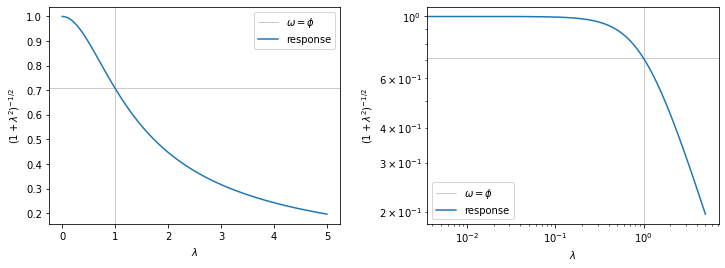

In [18]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: 1 / np.sqrt(1 + x**2)

x = np.linspace(0, 5, 1001)
y = f(x)

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0.3)

ax = plt.subplot(1, 2, 1)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$(1 + \lambda^2)^{-1/2}$')
ax.axvline(1, color='#999', lw=0.5, label='$\omega = \phi$')
ax.axhline(f(1), color='#999', lw=0.5)
ax.plot(x, y, label='response')
ax.legend()

ax = plt.subplot(1, 2, 2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$(1 + \lambda^2)^{-1/2}$')
ax.axvline(1, color='#999', lw=0.5, label='$\omega = \phi$')
ax.axhline(f(1), color='#999', lw=0.5)
ax.plot(x, y, label='response')
ax.legend()

plt.show()

this finally shows us why it's called a "low-pass" filter: at frequencies $\phi \ll \omega$ the signal gain is almost unaffected, but as $\phi$ gets closer to $\omega$ a significant gain reduction sets in.

In lots of engineering applications, the transient response is uninteresting, so people talk exclusively in terms of [frequency response](https://en.wikipedia.org/wiki/Frequency_response) and make [Bode plots](https://en.wikipedia.org/wiki/Bode_plot) consisting of the log-log plot above plus a similar one for the phase shift.
For patch-clamp the transient response is usually the interesting bit, but the equipment can still be analysed in terms of its frequency response, and noise-reduction through filtering is often described purely in frequency terms too.

## General frequency response

To see how the above example generalises, we start with an impulse response $h(t)$ **for a stable system** and a cosine input

$$u(t) = \cos(\omega t)$$
to get output
$$y(t) = \int_0^t h(\tau)\cos(\omega(t - \tau))d\tau$$
which we can write as
$$y(t) = \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau - \int_t^\infty h(\tau)\cos(\omega(t - \tau))d\tau$$

Recall that this is an equation _for a single value_ $y$ of $t$.
Because system is _stable_, its impulse response $h(t)$ will dampen out for increasing values of $t$.
As a result, the multiplication by $h$ will cause **the second term to dampen out as the starting point of the integral, $t$, increases**:

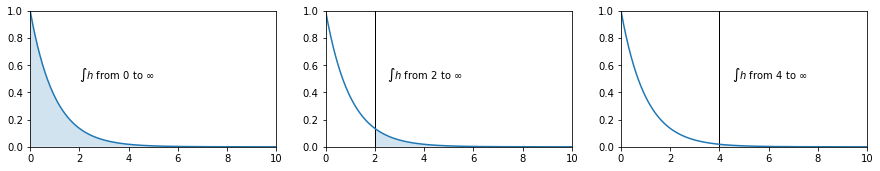

In [38]:
fig = plt.figure(figsize=(15, 2.5))

f = lambda x: np.exp(-x)
x = np.linspace(0, 10, 1001)
y = f(x)

ax = fig.add_subplot(1, 3, 1)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.plot(x, y)
ax.fill_between(x, y, alpha=0.2)
ax.text(2, 0.5, '$\int h$ from 0 to $\infty$')

ax = fig.add_subplot(1, 3, 2)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.axvline(x[200], color='k', lw=1)
ax.plot(x, y)
ax.fill_between(x[200:], y[200:], alpha=0.2)
ax.text(2.5, 0.5, '$\int h$ from 2 to $\infty$')

ax = fig.add_subplot(1, 3, 3)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.axvline(x[400], color='k', lw=1)
ax.plot(x, y)
ax.fill_between(x[400:], y[400:], alpha=0.2)
ax.text(4.5, 0.5, '$\int h$ from 4 to $\infty$')

plt.show()

By contrast, the integral in the first term
$$y_{ss}(t) = \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau$$
is always taken from 0 to $\infty$, so over the full range of $h$.

This splits the system into a _sinusoidal steady-state response_ (first term) and a _transient_ (second term).

Assuming that we're only interested in the sinusoidal steady-state response $y_{ss}$, we can then analyse the system by looking at $y_{ss}$ exclusively:

\begin{align}
y_{ss}(t)
    &= \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau \\
    &= \frac{1}{2} \int_0^\infty h(\tau)\left(e^{i\omega(t - \tau)} + e^{-i\omega(t - \tau)}\right)d\tau \\
    &= \frac{1}{2} e^{i\omega t} \int_0^\infty h(\tau)e^{-i\omega\tau} d\tau +
       \frac{1}{2} e^{-i\omega t} \int_0^\infty h(\tau)e^{i\omega\tau} d\tau \\
    &= \frac{1}{2} e^{i\omega t} H(i\omega) + \frac{1}{2} e^{-i\omega t} H(-i\omega) \\
\end{align}

To go further, we first need to show that $H(-i\omega)$ and $H(i\omega)$ are each other's complex conjugates, i.e. $\overline{H(-i\omega)}=H(i\omega)$:

\begin{align}
H(-i\omega) = \int_0^\infty h(t)e^{i\omega t}dt
            = \int_0^\infty h(t)\cos(\omega t)dt + i \int_0^\infty h(t)\sin(\omega t)dt
\end{align}

and because $h(t)$ and $\cos$ and $\sin$ are real-valued the first and second terms are $H(-i\omega)$'s real and imaginary parts.
Next, since

\begin{align}
H(i\omega) = \int_0^\infty h(t)e^{-i\omega t}dt
           &= \int_0^\infty h(t)\cos(-\omega t)dt + i \int_0^\infty h(t)\sin(-\omega t)dt \\
           &= \int_0^\infty h(t)\cos(\omega t)dt - i \int_0^\infty h(t)\sin(\omega t)dt \\
           &= H(-i\omega)
\end{align}

Now, using $R=\operatorname{Re}(H(i\omega))$ and $I=\operatorname{Im}(H(i\omega))$ we can write

\begin{align}
y_{ss}(t)
    &= \frac{1}{2} \left[ e^{i\omega t} H(i\omega) + e^{-i\omega t} H(-i\omega) \right] \\
    &= \frac{1}{2} \left[ e^{i\omega t} H(i\omega) + e^{-i\omega t} \overline{H(i\omega)} \right] \\
    &= \frac{1}{2} \left[ e^{i\omega t} R + i e^{i\omega t} I + e^{-i\omega t} R - i e^{-i\omega t} I \right] \\
    &= \frac{1}{2} \left[ (e^{i\omega t} + e^{-i\omega t}) R + i (e^{i\omega t} - i e^{-i\omega t}) I \right] \\
    &= R\cos(\omega t) - I\sin(\omega t) \\
\end{align}

Finally, using the harmonic addition theorem in atan2 form (see above), we get

\begin{align}
y_{ss}(t) = |H(i\omega)| \cos(\omega t + \angle H(i\omega))
\end{align}

where $|H(iw)| = \sqrt{R^2 + I^2}$ and $\angle H(i\omega) = \operatorname{atan2}(I, R)$.

As a result, a **stable** system's _sinusoidal steady state_ when driven with a frequency $\omega$ consists of a scaling and a phase shift, and can be written in terms of its _frequency response_ $H(i\omega)$.

## Filters

We now revisit the low-pass filter $H(s) = \omega / (s + \omega)$ when driven with an input $u(t)=\cos(\phi t)$.

Recognising that for $\omega > 0$ the system is stable, and **ignoring the transient response**, we fill in

$$H(i \phi) = \frac{\omega}{i \phi + \omega}$$

so that
$$|H(i \omega)| = \frac{\omega}{\sqrt{\phi^2 + \omega^2}}$$
and
$$\angle H(i \omega) = \operatorname{atan2}(\phi, \omega) = \arctan(\phi / \omega)$$
(where the last bit holds because $\phi > 0$ and $\omega > 0$), to find
\begin{align}
y_{ss}(t) = \frac{\omega}{\sqrt{\phi^2 + \omega^2}} \cos(\omega t + \arctan(\phi / \omega))
\end{align}

\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
\begin{align}
\end{align}
